<a href="https://colab.research.google.com/github/bishal454/AI_PROJECT/blob/main/real_estate_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv("Lucknow_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Gomti Nagar,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Sultanpur Lucknow Road,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Ansal API,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,amar shaheed path lucknow,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Arjunganj,2 BHK,NaN,1200,2.0,1.0,51.00


In [16]:
df1.shape

(13320, 9)

In [17]:
df1.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [18]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [19]:
df1['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [20]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

# **Data Cleaning : Handling NA Values**

In [21]:
df2.isnull().sum()

,0
location,0
size,16
total_sqft,0
bath,73
price,0


In [22]:
df2.shape

(13320, 5)

In [23]:
df3 = df2.dropna()
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [24]:
df3.shape

(13247, 5)

# **Feature Engineering :**
# Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [25]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
is_float(4.0)

True

In [30]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,sultanpur road near shaheed pa,4 BHK,2100 - 2850,4.0,186.000,4
122,Lalbagh,4 BHK,3067 - 8156,4.0,477.000,4
137,Sultanpur Lucknow Road,2 BHK,1042 - 1105,2.0,54.005,2
165,Gomti Nagar Extension,2 BHK,1145 - 1340,2.0,43.490,2
188,Gosainganj,2 BHK,1015 - 1540,2.0,56.800,2
410,Cantonment,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Cantonment,2 BHK,1195 - 1440,2.0,63.770,2
648,Cantonment,9 Bedroom,4125Perch,9.0,265.000,9
661,ahmamau,2 BHK,1120 - 1145,2.0,48.130,2
672,Mohaan Road,4 Bedroom,3090 - 5002,4.0,445.000,4


# Above shows that total_sqft can be a range (e.g. 2100-2850). For such cases we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter and 4125Perch which one can convert to square ft using unit conversion or just drop such cases and try to keep things simple.

In [32]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [33]:
convert_sqft_to_num('2560')

2560.0

In [34]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [35]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Gomti Nagar,2 BHK,1056.0,2.0,39.07,2
1,Sultanpur Lucknow Road,4 Bedroom,2600.0,5.0,120.00,4
2,Ansal API,3 BHK,1440.0,2.0,62.00,3
3,amar shaheed path lucknow,3 BHK,1521.0,3.0,95.00,3
4,Arjunganj,2 BHK,1200.0,2.0,51.00,2
5,Arjunganj,2 BHK,1170.0,2.0,38.00,2
6,Purvanchal Expressway Under Construction,4 BHK,2732.0,4.0,204.00,4
7,Hazratganj,4 BHK,3300.0,4.0,600.00,4
8,Gomti Nagar,3 BHK,1310.0,3.0,63.25,3
9,Arjunganj,6 Bedroom,1020.0,6.0,370.00,6


In [36]:
df4.loc[30]

,30
location,sultanpur road near shaheed pa
size,4 BHK
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


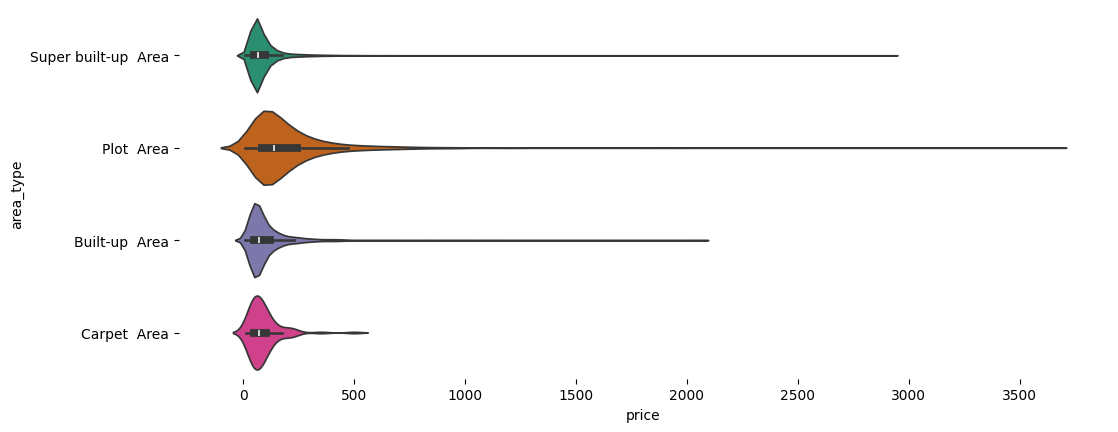

In [15]:
# @title area_type vs price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['area_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='price', y='area_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

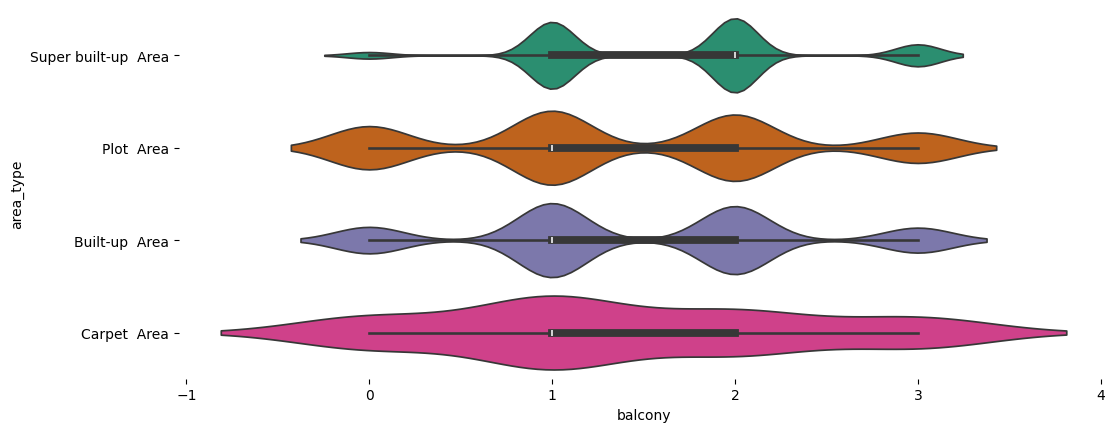

In [14]:
# @title area_type vs balcony

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['area_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='balcony', y='area_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

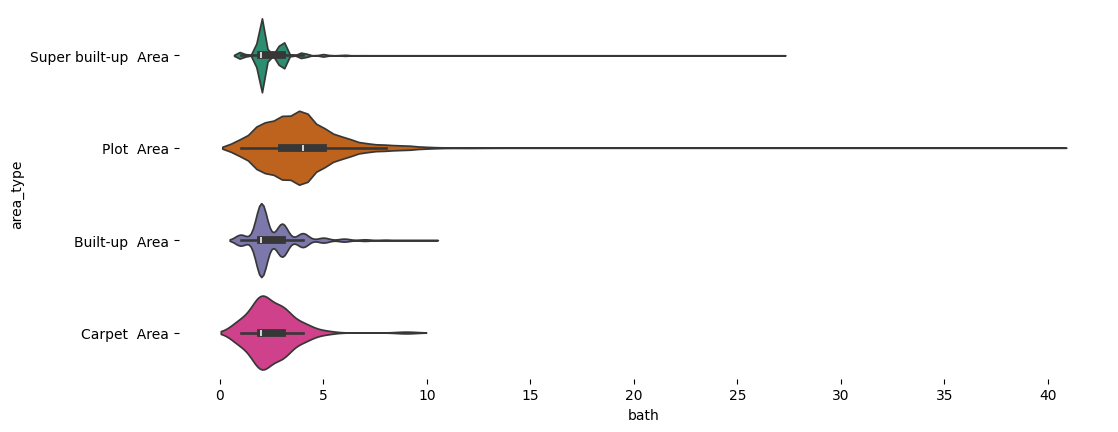

In [13]:
# @title area_type vs bath

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['area_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='bath', y='area_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

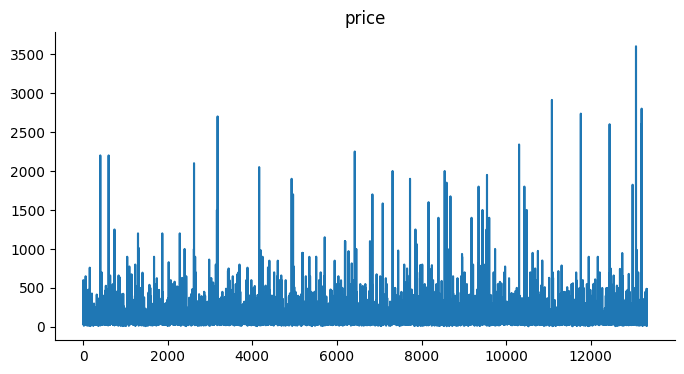

In [12]:
# @title price

from matplotlib import pyplot as plt
df1['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

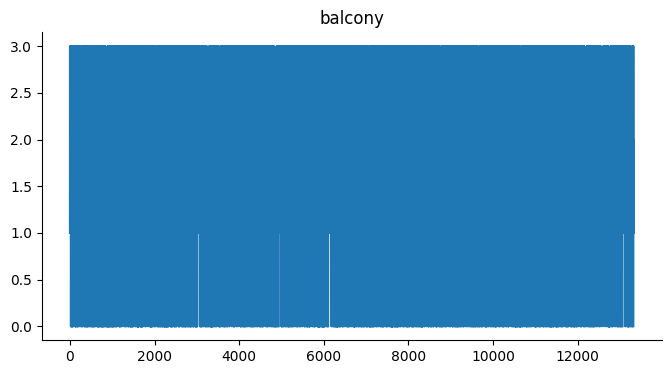

In [11]:
# @title balcony

from matplotlib import pyplot as plt
df1['balcony'].plot(kind='line', figsize=(8, 4), title='balcony')
plt.gca().spines[['top', 'right']].set_visible(False)

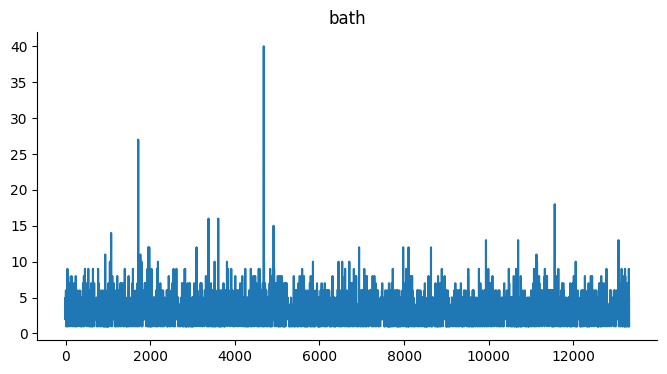

In [10]:
# @title bath

from matplotlib import pyplot as plt
df1['bath'].plot(kind='line', figsize=(8, 4), title='bath')
plt.gca().spines[['top', 'right']].set_visible(False)

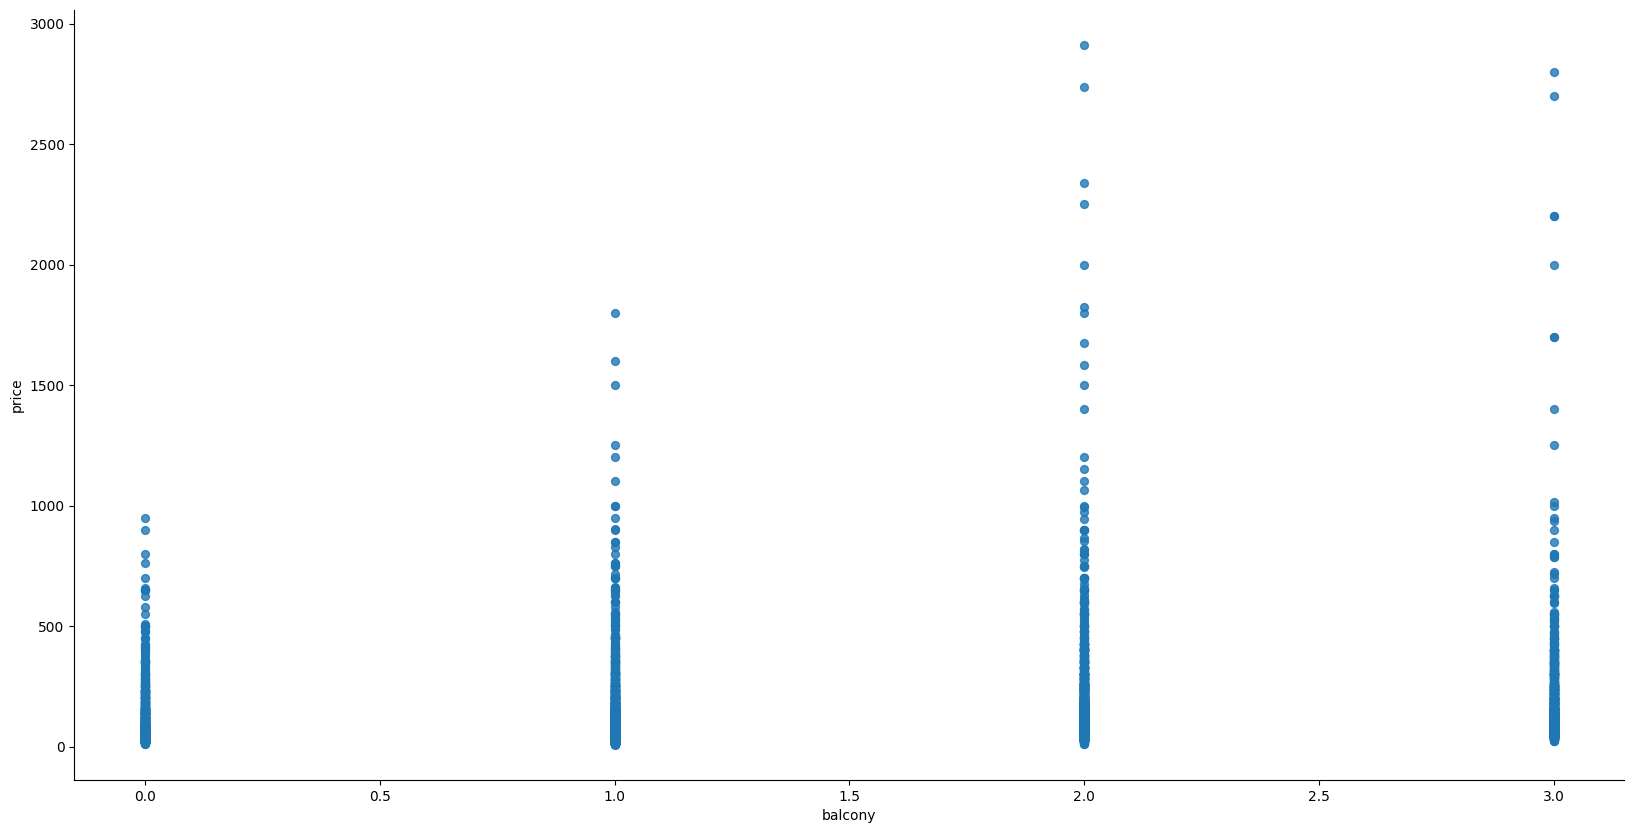

In [9]:
# @title balcony vs price

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='balcony', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

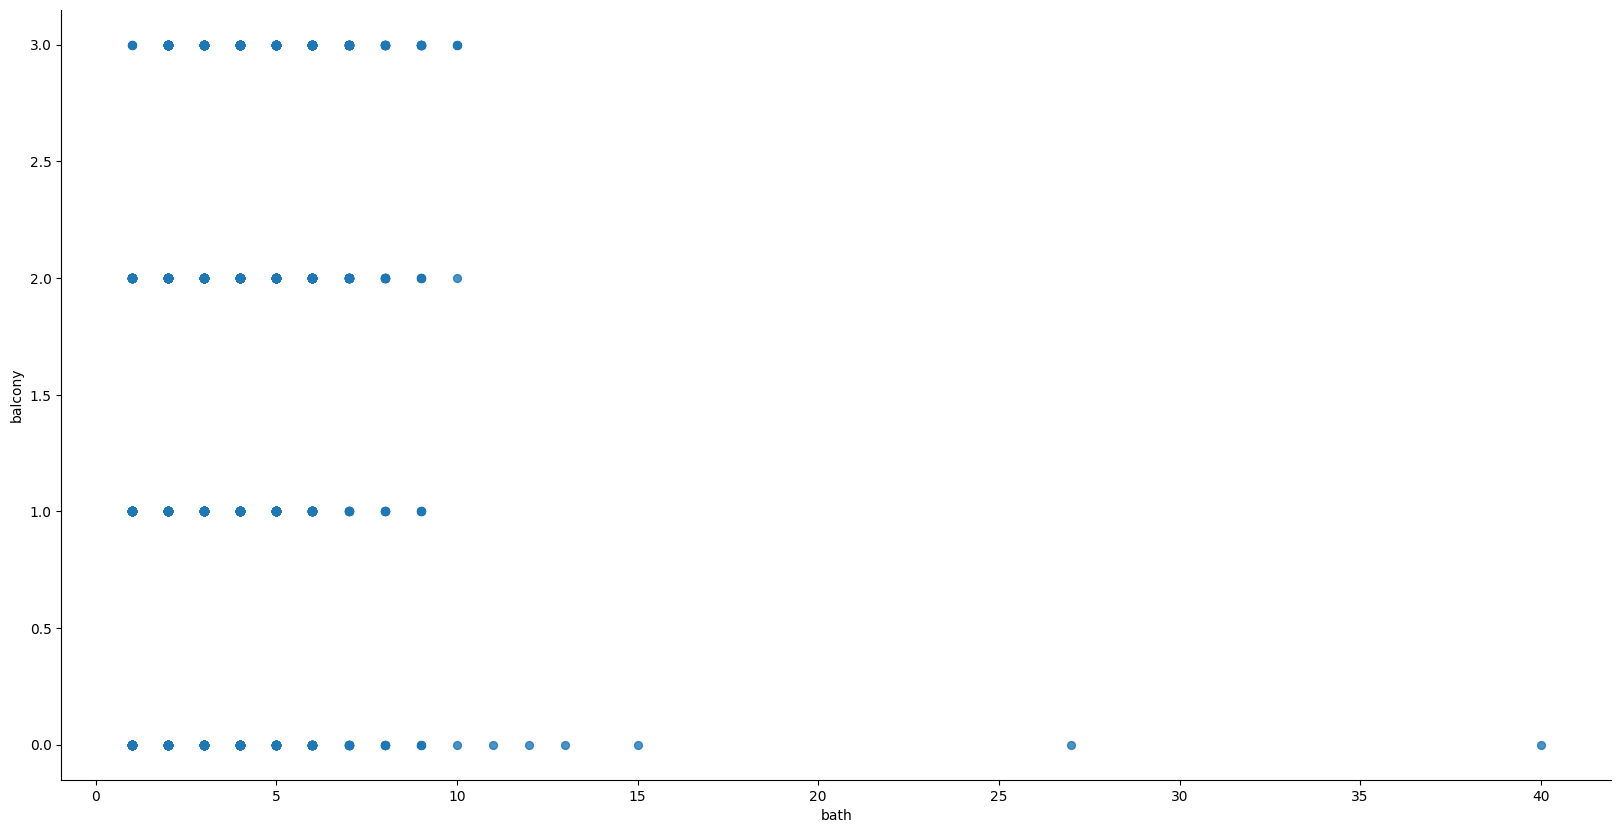

In [8]:
# @title bath vs balcony

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='bath', y='balcony', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

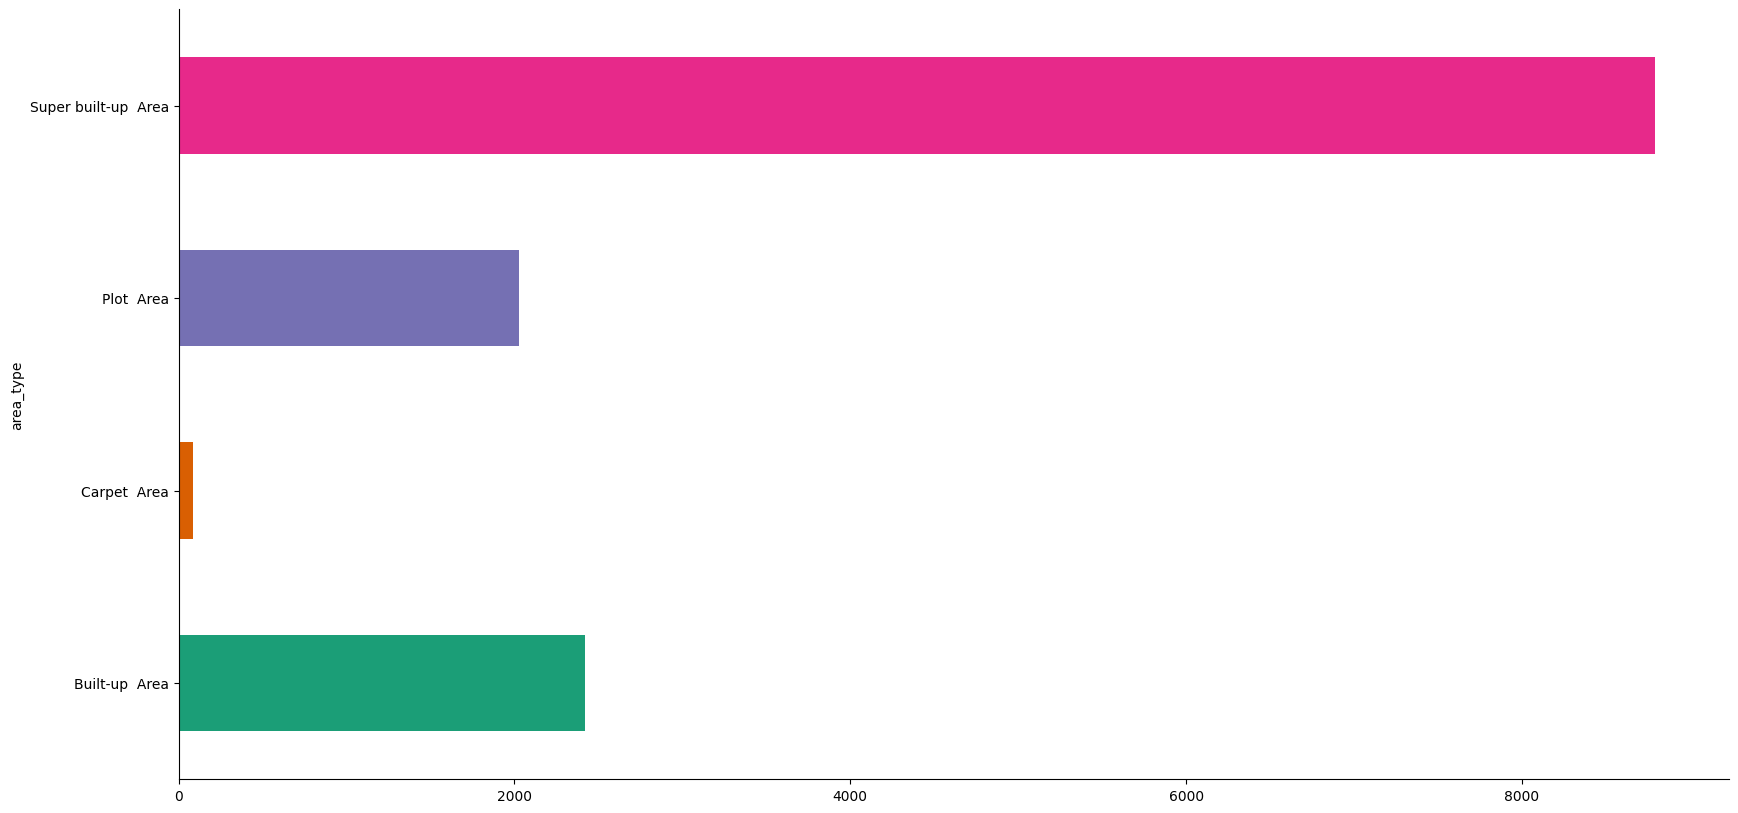

In [7]:
# @title area_type

from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('area_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

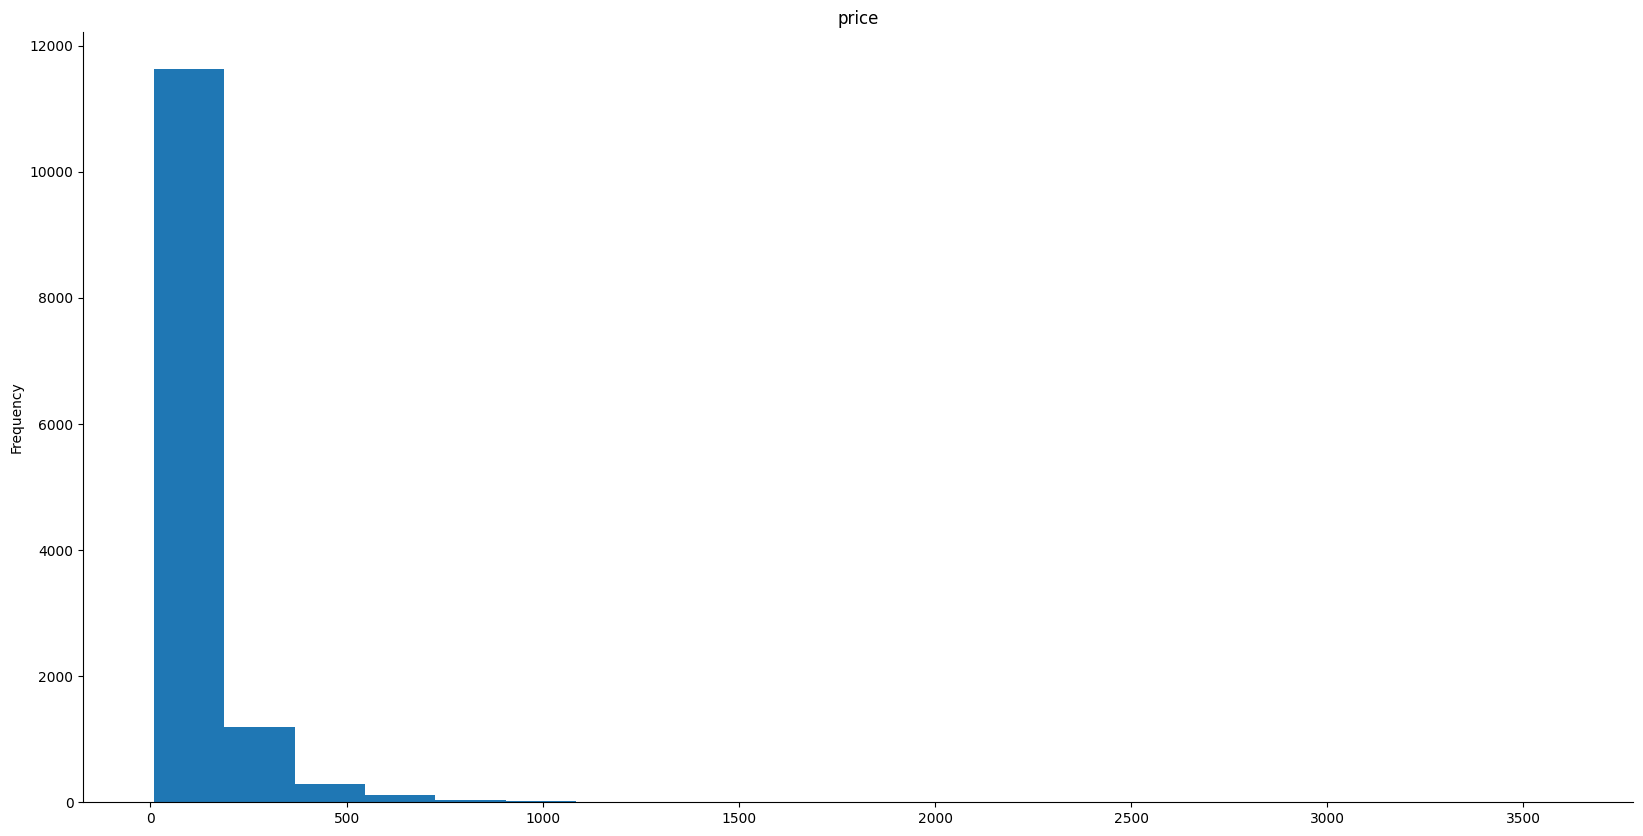

In [6]:
# @title price

from matplotlib import pyplot as plt
df1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

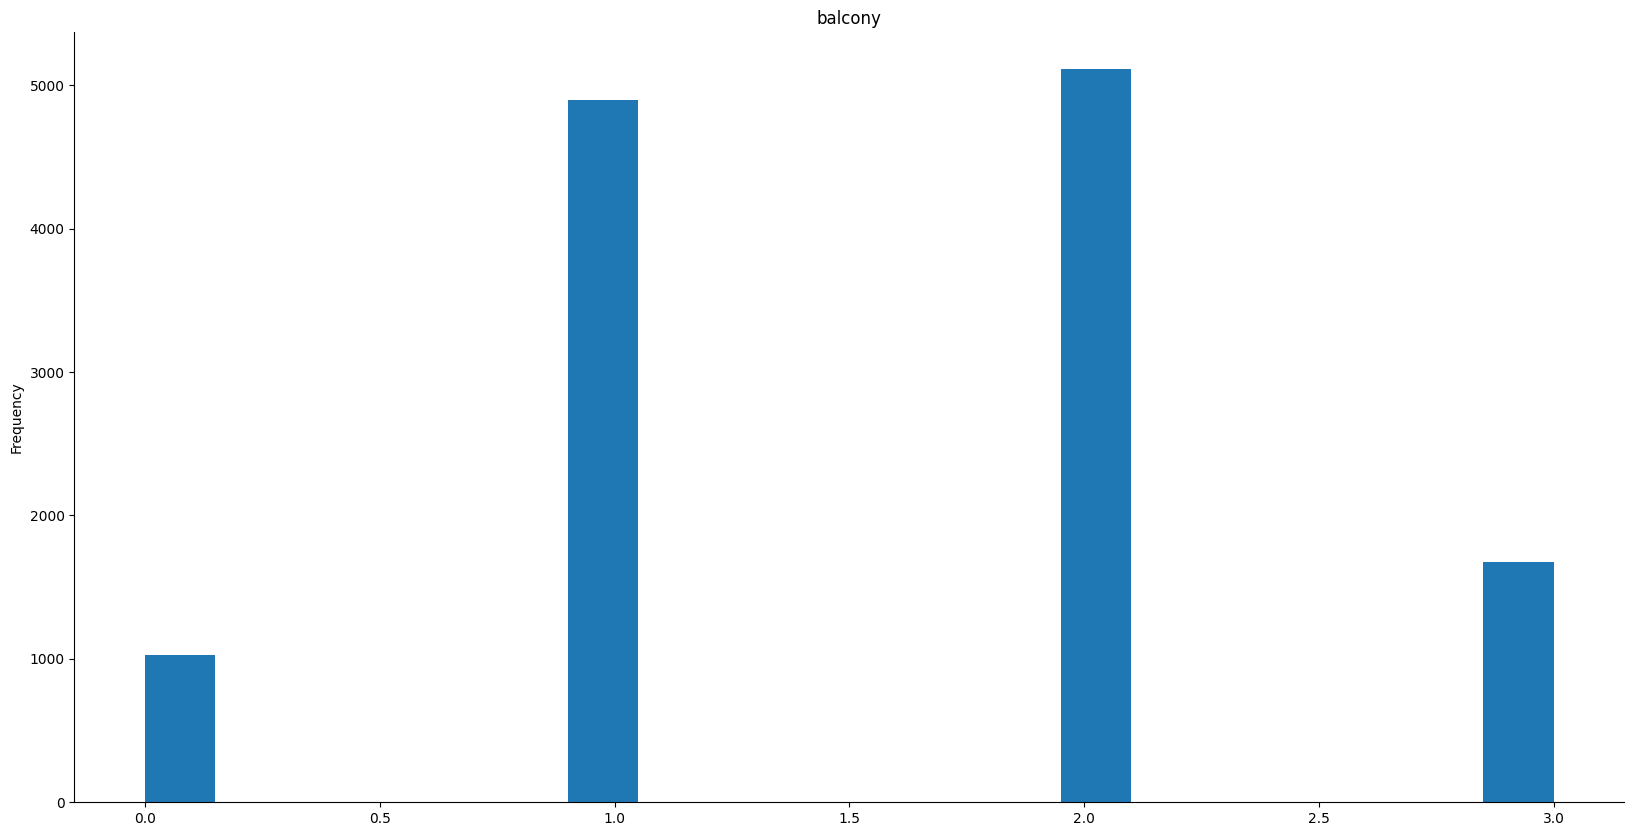

In [5]:
# @title balcony

from matplotlib import pyplot as plt
df1['balcony'].plot(kind='hist', bins=20, title='balcony')
plt.gca().spines[['top', 'right',]].set_visible(False)

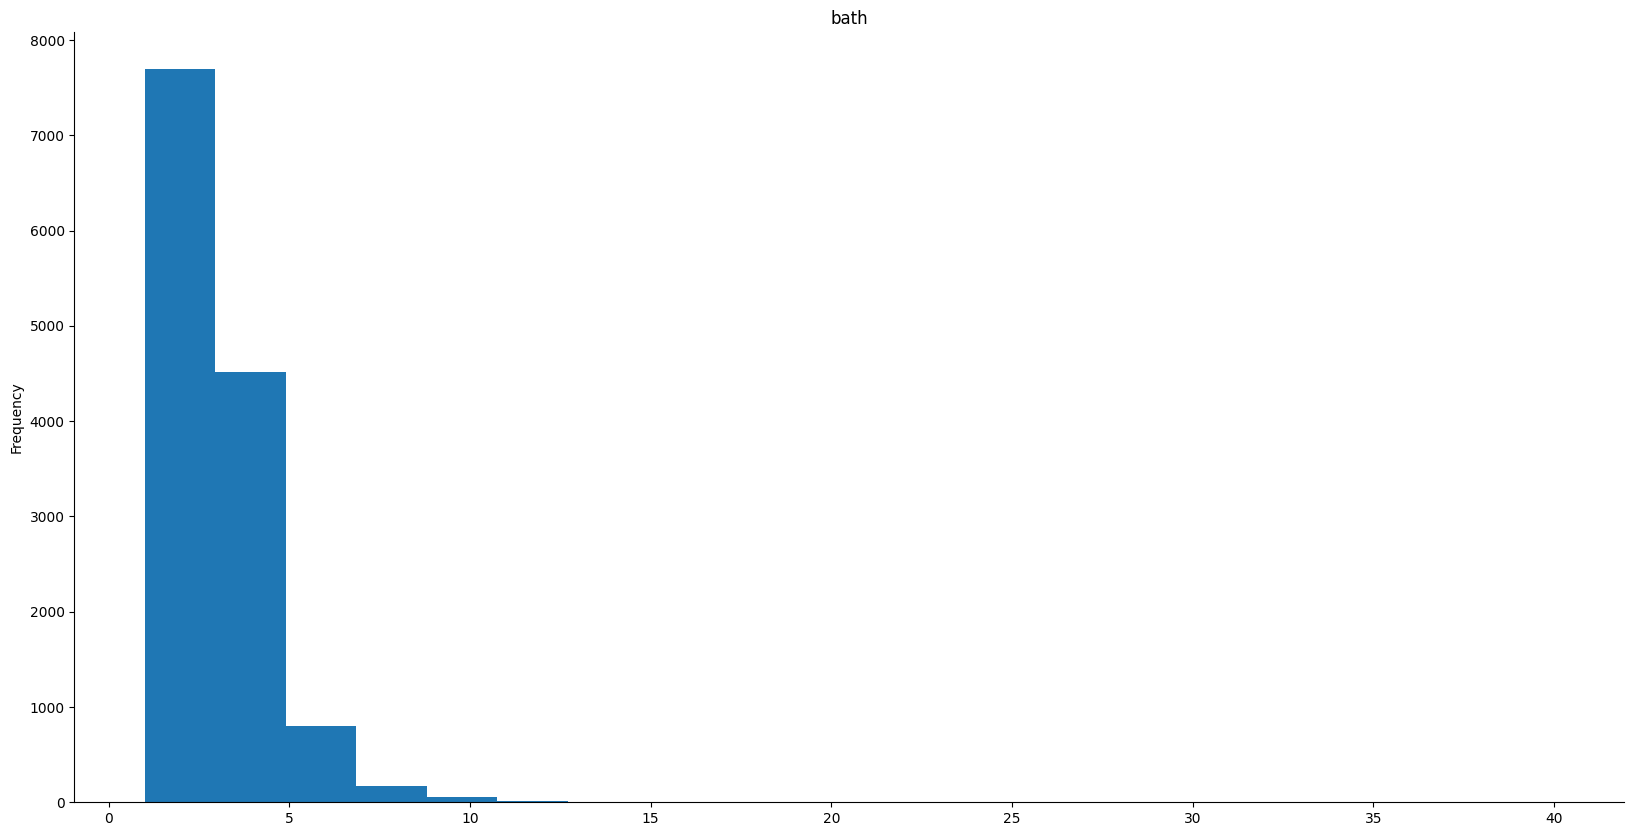

In [4]:
# @title bath

from matplotlib import pyplot as plt
df1['bath'].plot(kind='hist', bins=20, title='bath')
plt.gca().spines[['top', 'right',]].set_visible(False)